In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [268]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [269]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Pre Processing Data

In [270]:
print('\nNull Values in Training \n{}'.format(train.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test.isnull().sum()))

print('\nDuplicated values in train {}'.format(train.duplicated().sum()))
print('Duplicated values in test {}'.format(test.duplicated().sum()))


Null Values in Training 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Values in Testing 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Duplicated values in train 0
Duplicated values in test 0


filling 
-> Embarked with most common port of embark.
-> Fare with the average value of fares.

In [271]:
print('Embarkation per ports \n{}'.format(train['Embarked'].value_counts()))

Embarkation per ports 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [272]:
train['Embarked'].fillna(value='S', inplace=True)
test['Fare'].fillna(value=test.Fare.mean(), inplace=True)

filling 
-> Age according to the title, and take the age average of each one (Miss, Mrs, Mr, Master, Dr, Ms)

In [273]:
mean_age_miss = train[train["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = train[train["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = train[train["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = train[train["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))

Mean age of Miss. title 22.0
Mean age of Mrs. title 36.0
Mean age of Mr. title 33.0
Mean age of Master. title 5.0


In [274]:
def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

In [275]:
train['Age'] = train[['Name', 'Age']].apply(fill_age,axis=1)
test['Age'] = test[['Name', 'Age']].apply(fill_age,axis=1)

filling 
-> Cabin First with Variable 'X'
-> then fill better according to Fare value

In [276]:
train['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in train['Cabin']])
test['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in test['Cabin']])

In [277]:
print('Mean Fare of Cabin B {}'.format(round(train[train['Cabin']=='B']['Fare'].mean(), 2)))
print('Mean Fare of Cabin C {}'.format(round(train[train['Cabin']=='C']['Fare'].mean(), 2)))
print('Mean Fare of Cabin D {}'.format(round(train[train['Cabin']=='D']['Fare'].mean(), 2)))
print('Mean Fare of Cabin E {}'.format(round(train[train['Cabin']=='E']['Fare'].mean(), 2)))
print('Mean Fare of Cabin A {}'.format(round(train[train['Cabin']=='A']['Fare'].mean(), 2)))
print('Mean Fare of Cabin T {}'.format(round(train[train['Cabin']=='T']['Fare'].mean(), 2)))
print('Mean Fare of Cabin X {}'.format(round(train[train['Cabin']=='X']['Fare'].mean(), 2)))
print('Mean Fare of Cabin F {}'.format(round(train[train['Cabin']=='F']['Fare'].mean(), 2)))
print('Mean Fare of Cabin G {}'.format(round(train[train['Cabin']=='G']['Fare'].mean(), 2)))

Mean Fare of Cabin B 113.51
Mean Fare of Cabin C 100.15
Mean Fare of Cabin D 57.24
Mean Fare of Cabin E 46.03
Mean Fare of Cabin A 39.62
Mean Fare of Cabin T 35.5
Mean Fare of Cabin X 19.16
Mean Fare of Cabin F 18.7
Mean Fare of Cabin G 13.58


In [278]:
def reasign_cabin(cabin_fare):
    
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    
    if cabin=='X':
        if (fare >= 113.5):
            return 'B'
        if ((fare < 113.5) and (fare > 100)):
            return 'C'
        if ((fare < 100) and (fare > 57)):
            return 'D'
        if ((fare < 57) and (fare > 46)):
            return 'E'
        if ((fare < 46) and (fare > 39)):
            return 'A'            
        else:
            return 'X'
    else:
        return cabin

In [279]:
train['Cabin'] = train[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)
test['Cabin'] = test[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)

evaluate Pre Processing

In [280]:
print('\nNull Values in Training \n{}'.format(train.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test.isnull().sum()))

print('\nDuplicated values in train {}'.format(train.duplicated().sum()))
print('Duplicated values in test {}'.format(test.duplicated().sum()))


Null Values in Training 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Null Values in Testing 
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Duplicated values in train 0
Duplicated values in test 0


Finish Pre Processing

Visualizing Data

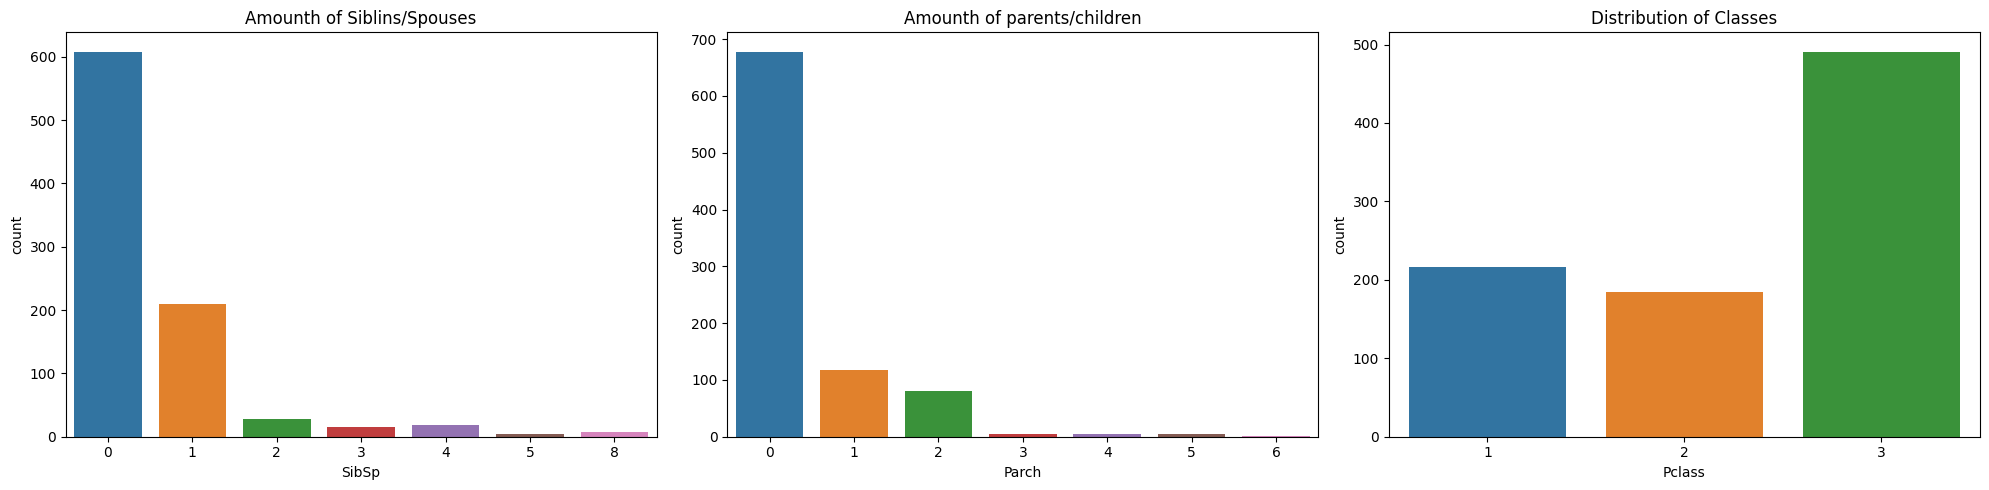

In [281]:
fig, axx = plt.subplots(1, 3, figsize=(20,5))

axx[0].set_title('Amounth of Siblins/Spouses')
sns.countplot(x='SibSp', data=train, ax=axx[0])

axx[1].set_title('Amounth of parents/children')
sns.countplot(x='Parch', data=train, ax=axx[1])

axx[2].set_title('Distribution of Classes')
sns.countplot(x='Pclass', data=train, ax=axx[2])

plt.tight_layout()

According to the graphics, we can see that most of the people were alone and most belonged to 3rd class (lower), We can create a new feature that specifies if the person was traveling alone or with family based on SibSp and Parch

Create two featrues:
1. Alone : passenger Alone (1: Yes, 0: No)
2. Familiars: number of passenger Family(sibsp and parch)

In [282]:
def create_alone_feature(SibSp_Parch):
    if (SibSp_Parch[0]+SibSp_Parch[1])==0:
        return 1
    else:
        return 0

train['Alone'] = train[['SibSp','Parch']].apply(create_alone_feature, axis=1)
train['Familiars'] = train['SibSp'] + train['Parch']

test['Alone'] = test[['SibSp','Parch']].apply(create_alone_feature, axis=1)
test['Familiars'] = test['SibSp'] + test['Parch']

Visualize Features

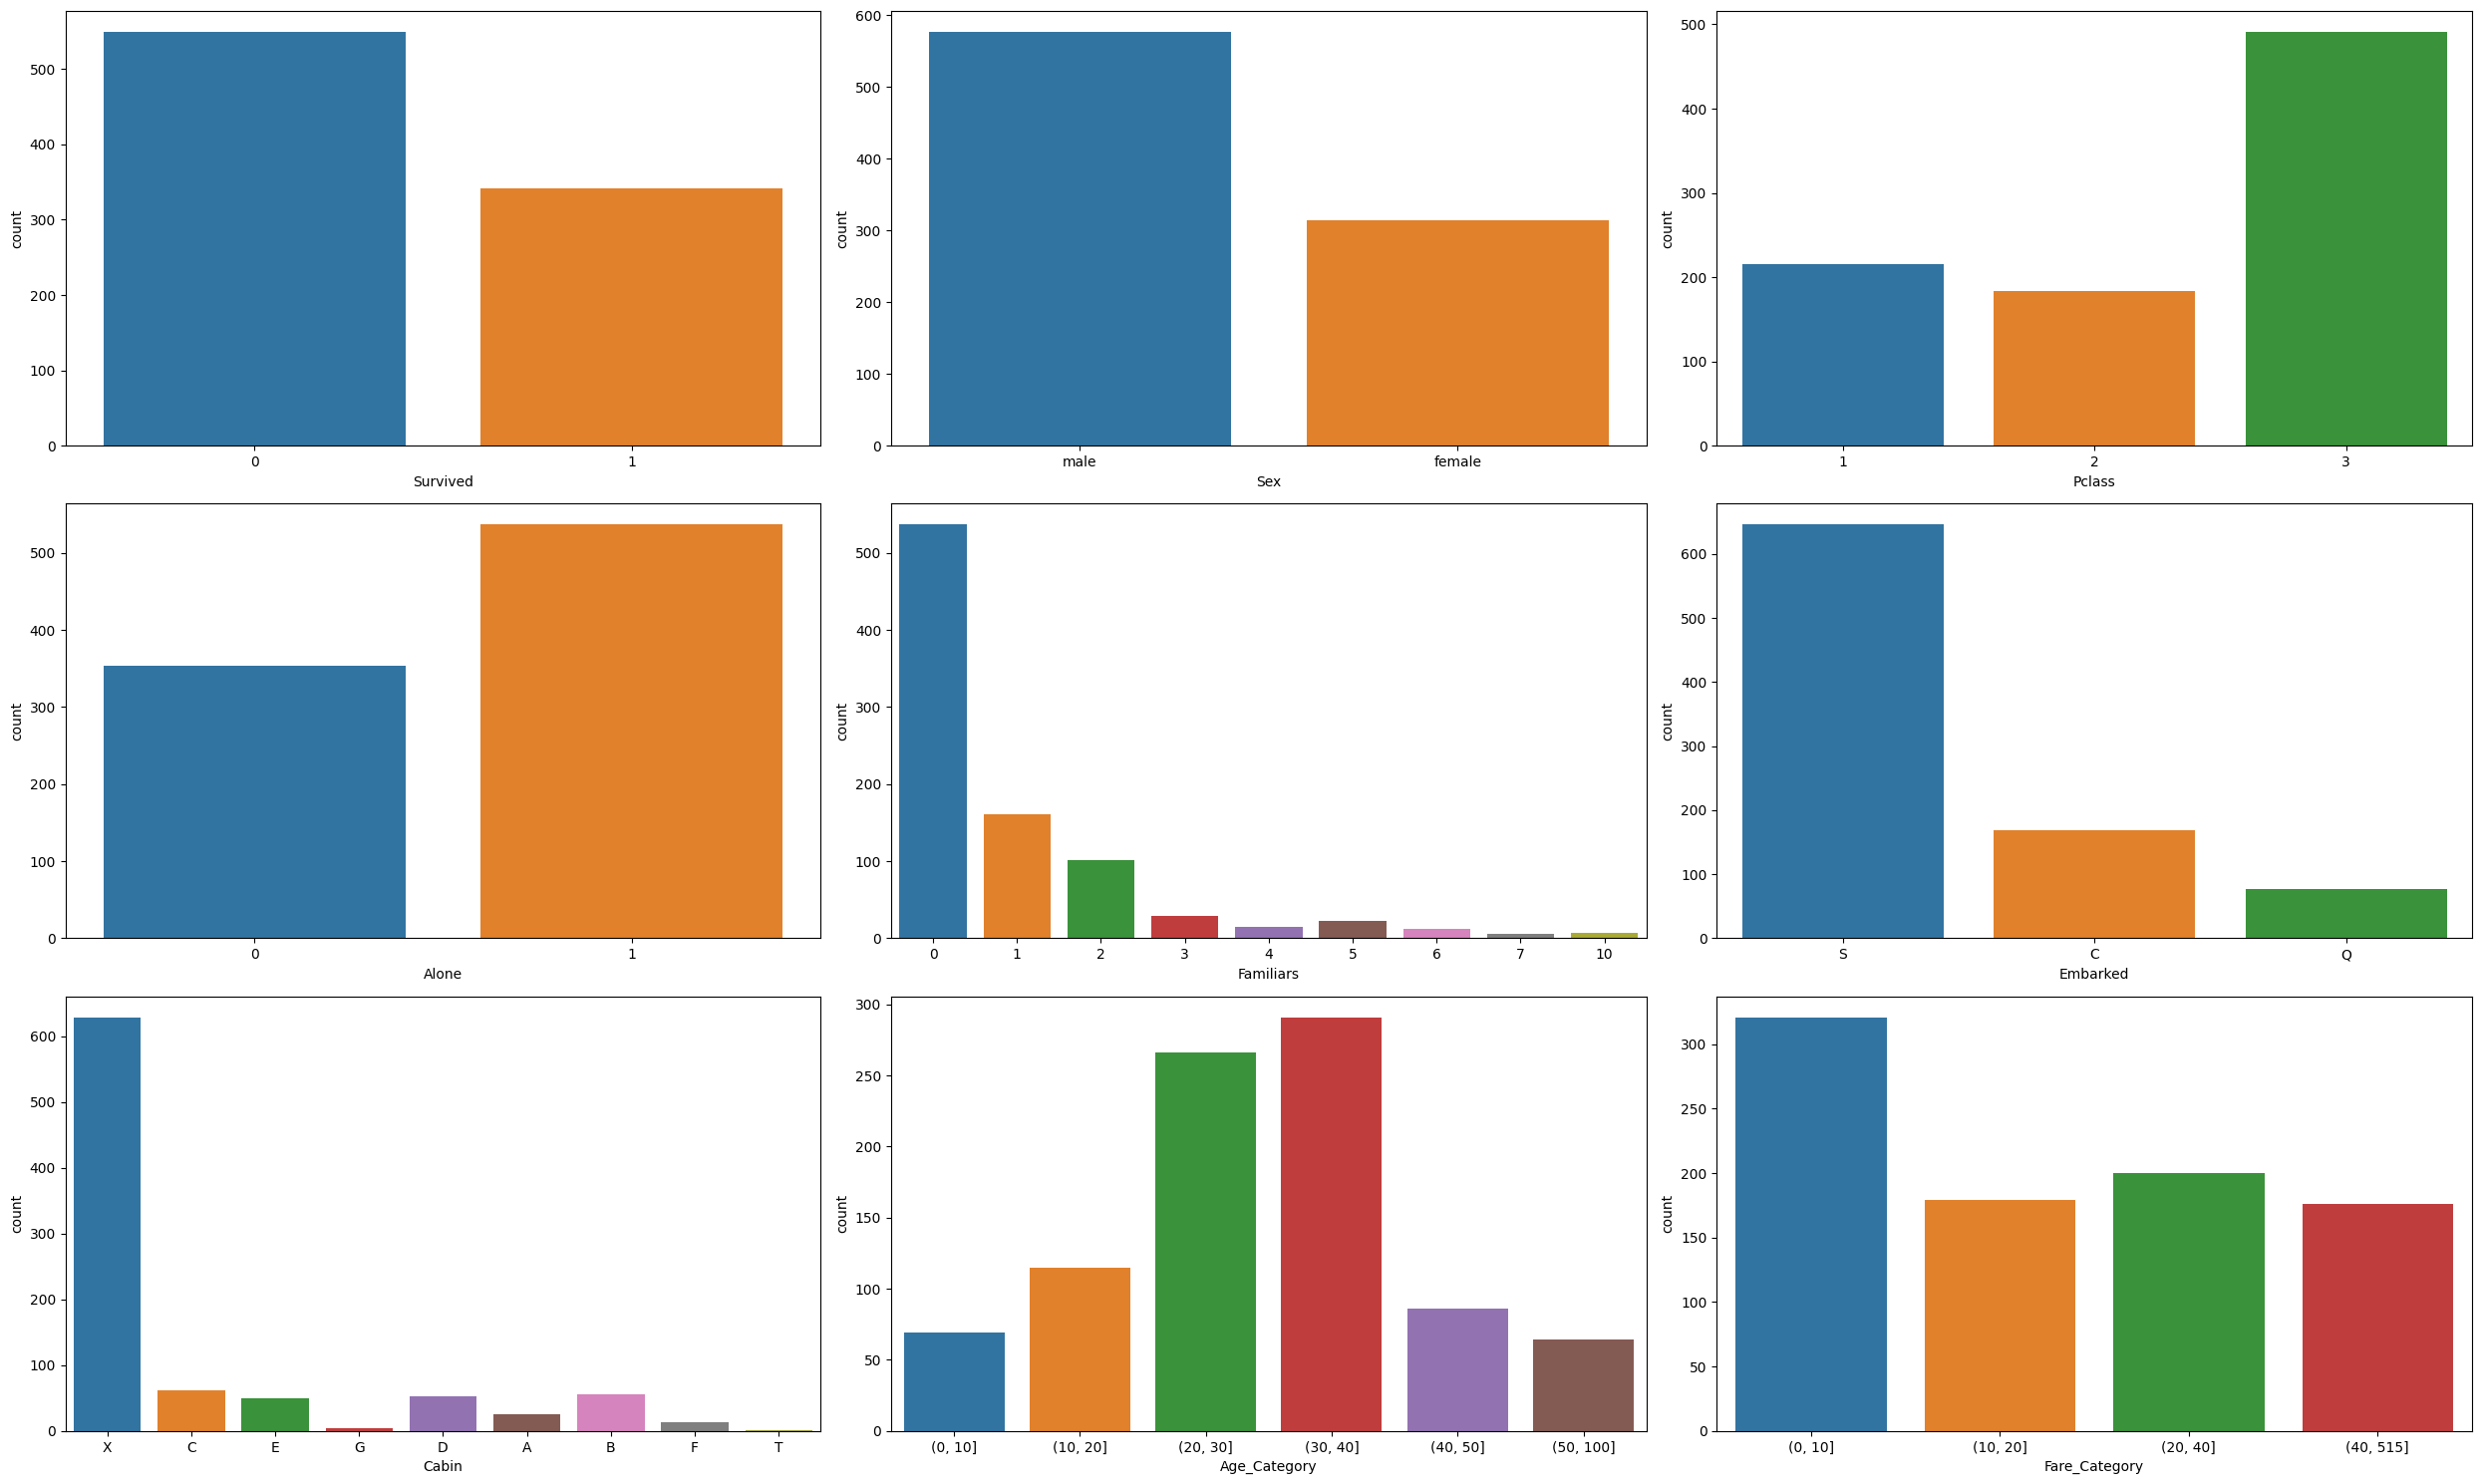

In [283]:
fig, axx = plt.subplots(3, 3, figsize=(25,15))

sns.countplot(x='Survived', data=train, ax=axx[0,0])
sns.countplot(x='Sex', data=train, ax=axx[0,1])
sns.countplot(x='Pclass', data=train, ax=axx[0,2])
sns.countplot(x='Alone', data=train, ax=axx[1,0])
sns.countplot(x='Familiars', data=train, ax=axx[1,1])
sns.countplot(x='Embarked', data=train, ax=axx[1,2])
sns.countplot(x='Cabin', data=train, ax=axx[2,0])


bins = [0, 10, 20, 30, 40, 50, 100]
train['Age_Category'] = pd.cut(train['Age'], bins=bins)
sns.countplot(x='Age_Category', data=train, ax=axx[2,1])

bins = [0, 10, 20, 40, 515]
train['Fare_Category'] = pd.cut(train['Fare'], bins=bins)
sns.countplot(x='Fare_Category', data=train, ax=axx[2,2])

plt.tight_layout()

/home/arminjp/Documents/Project/pandas/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


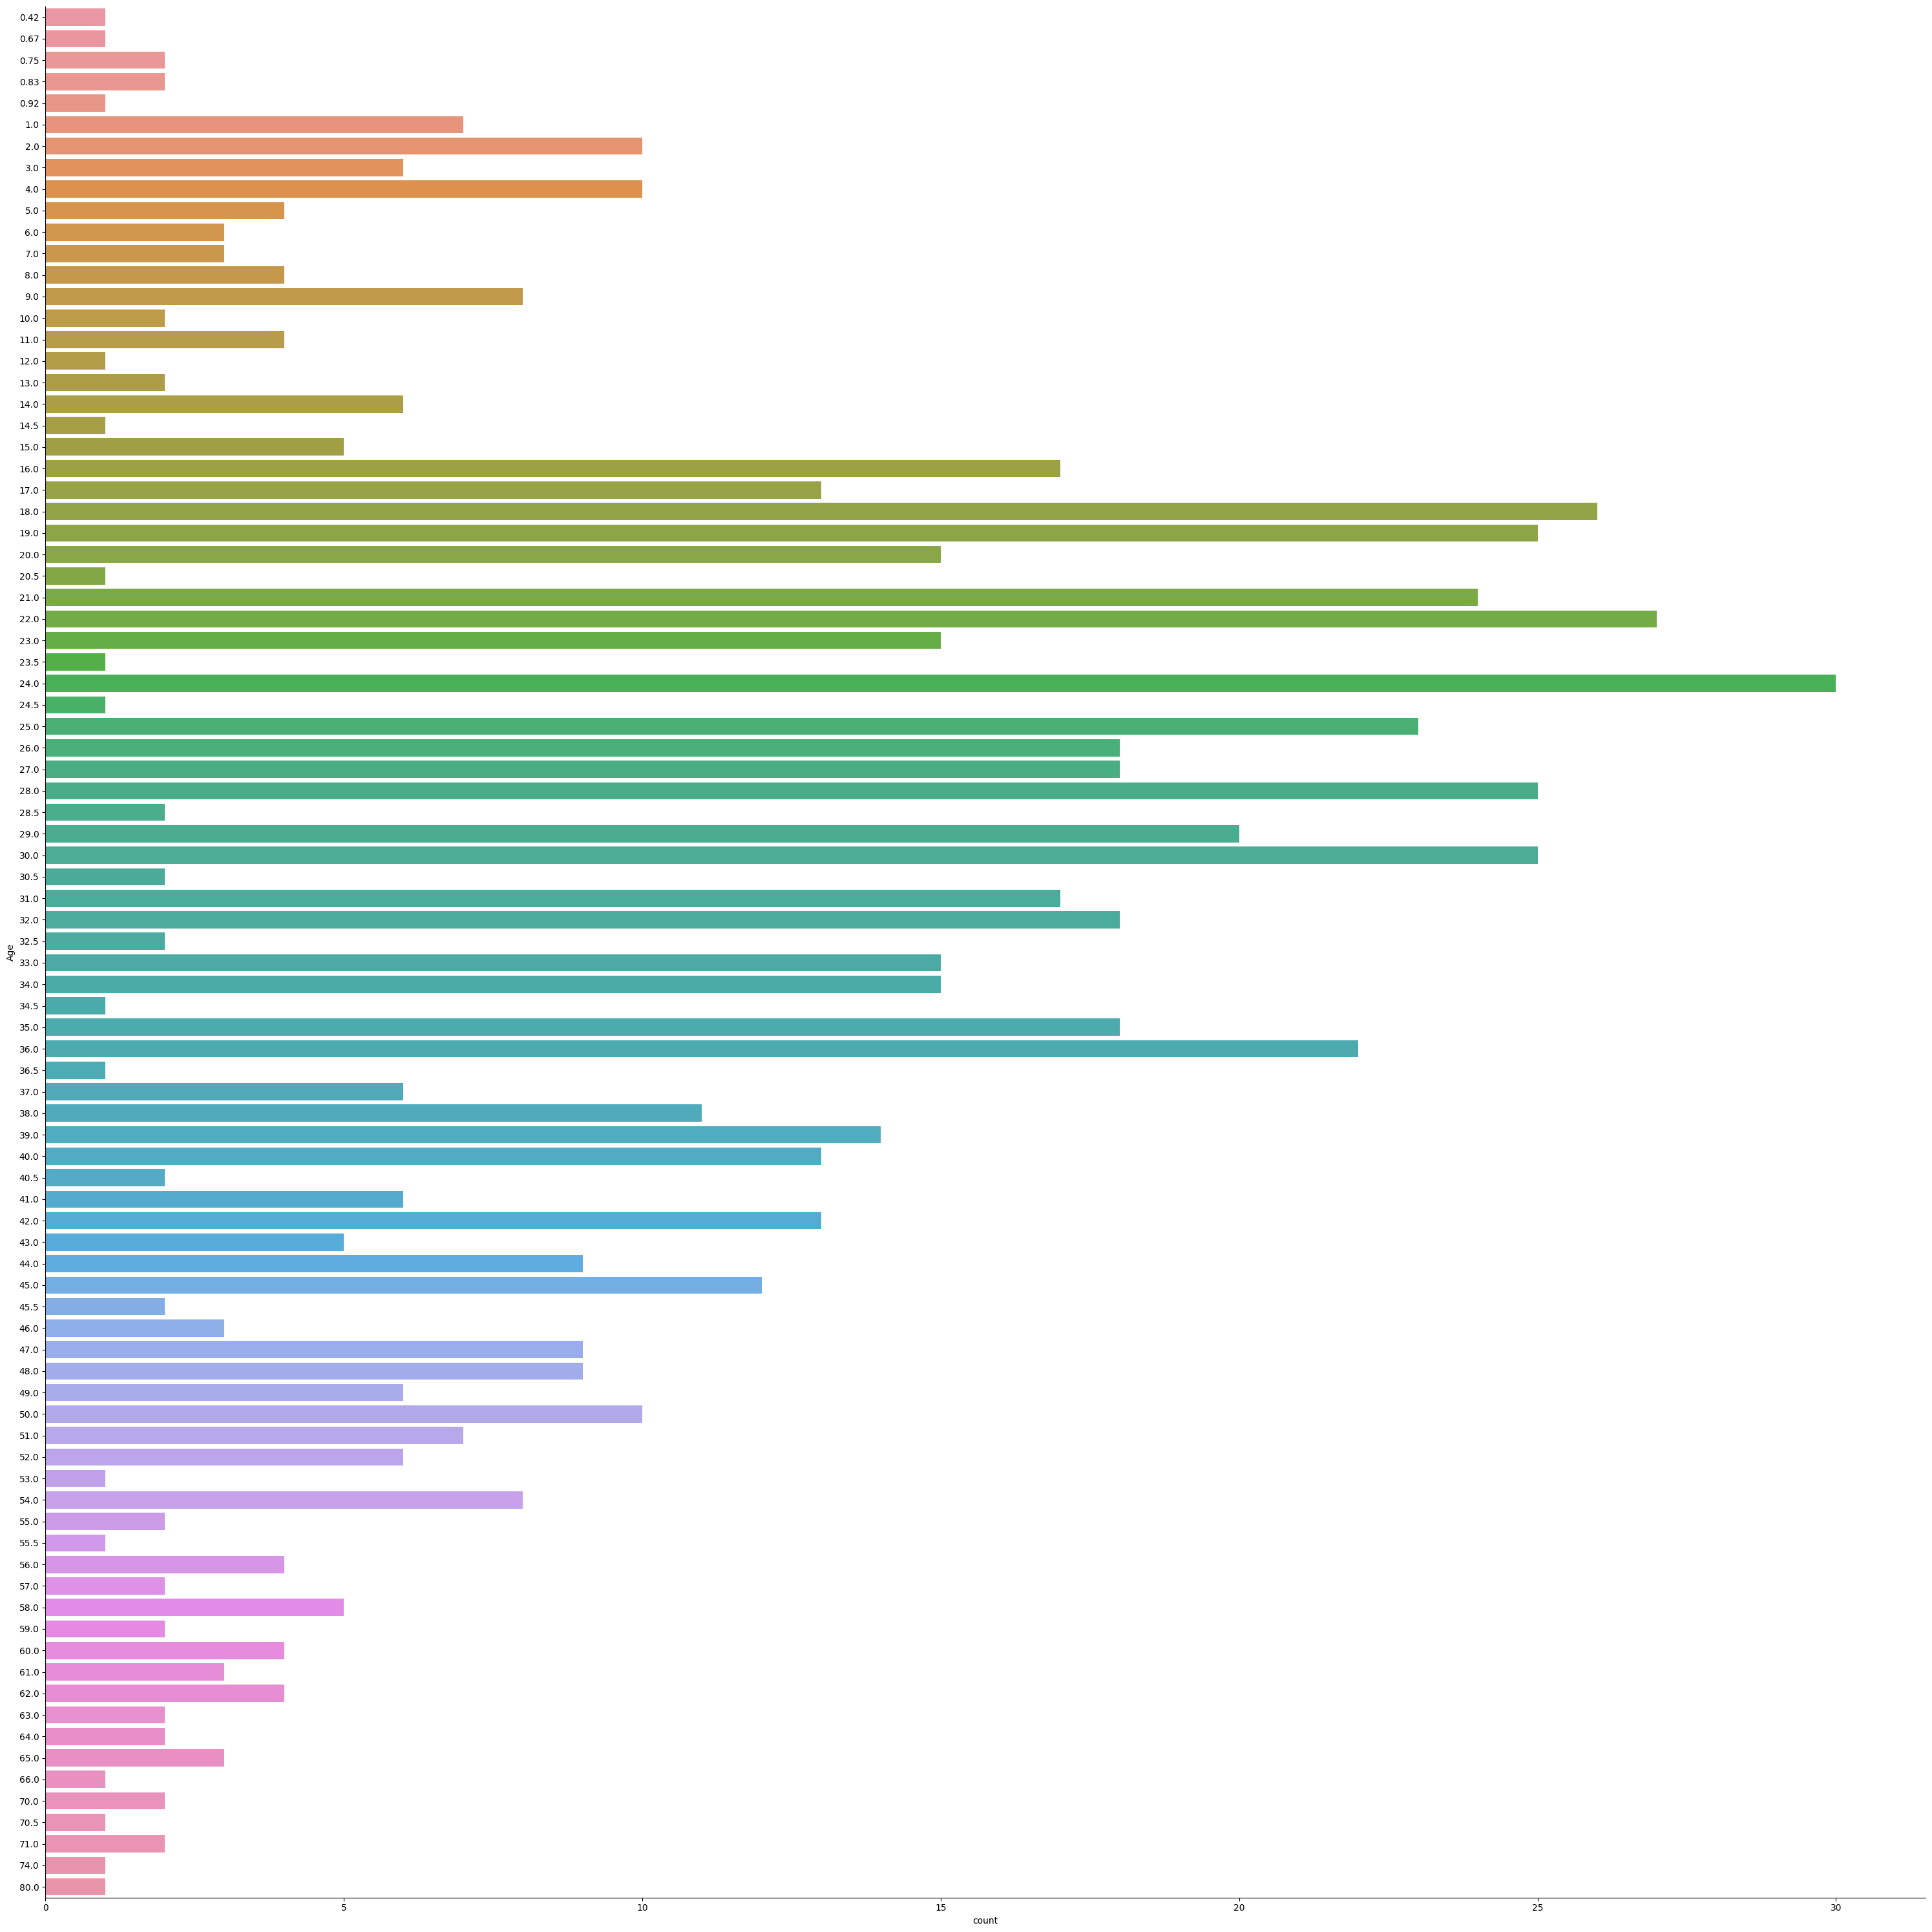

In [284]:
sns.catplot(y='Age', kind='count', data=t, height=30)

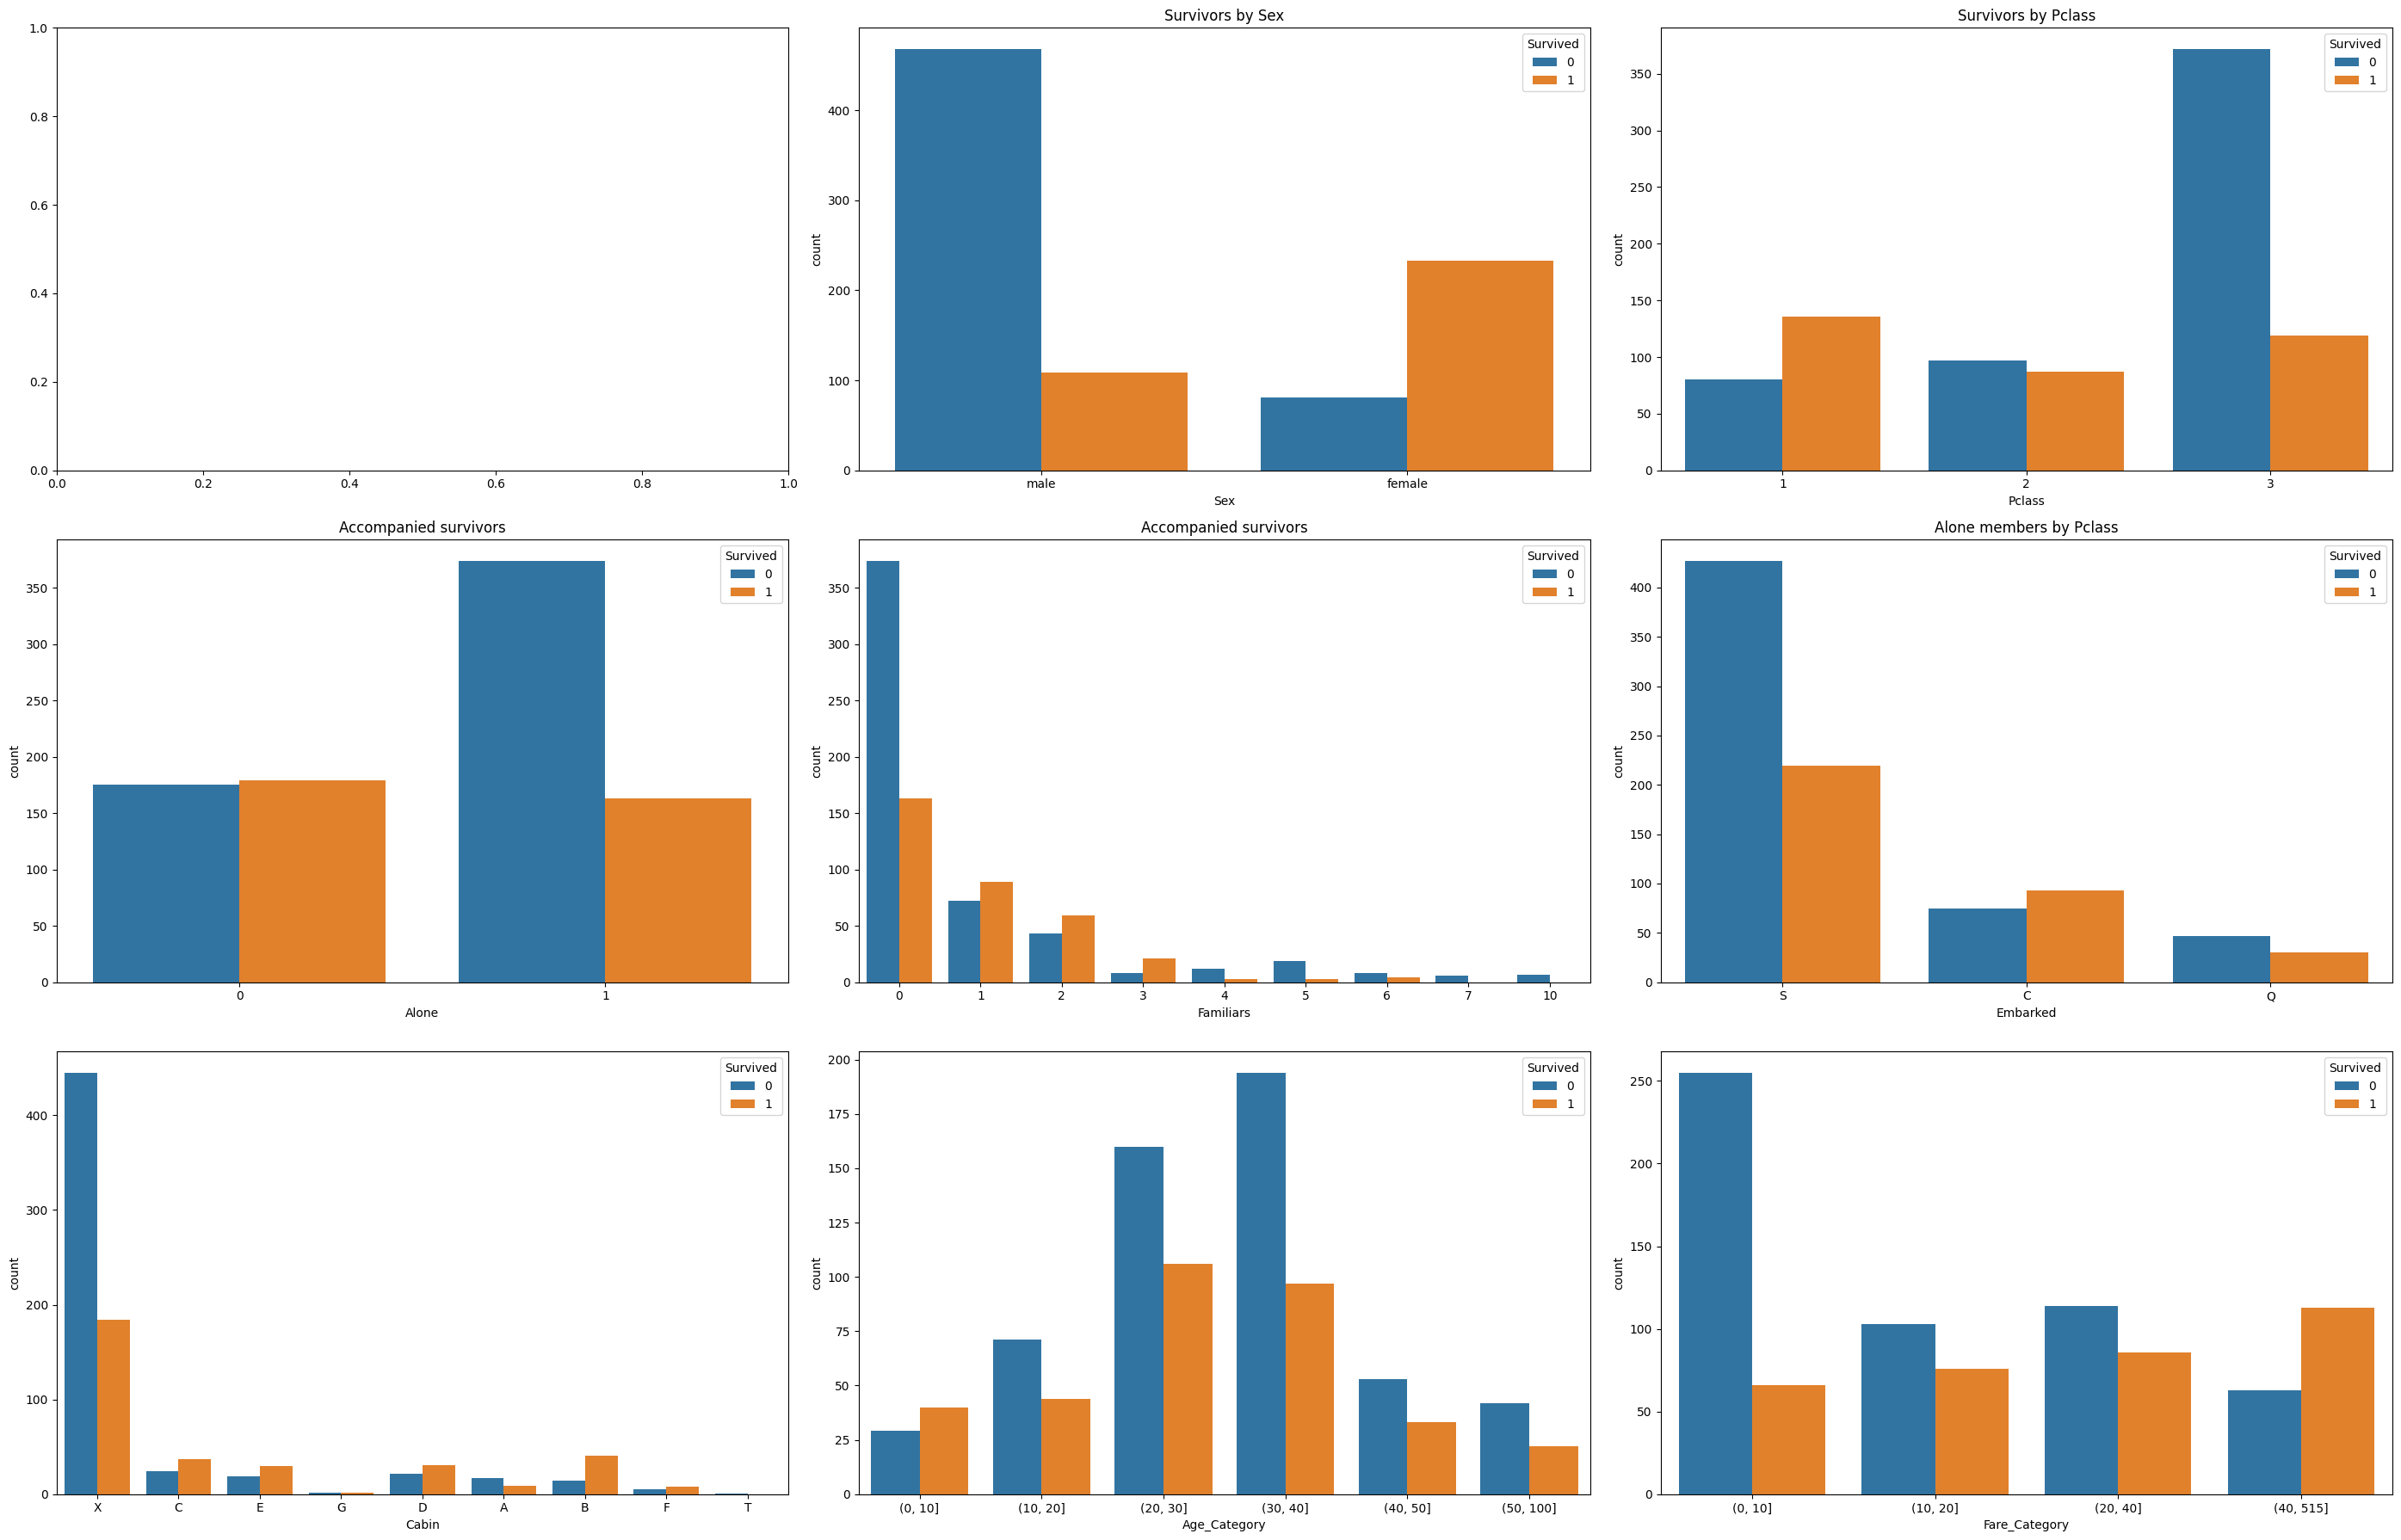

In [285]:
fig, axx = plt.subplots(3, 3, figsize=(28,18))

axx[0,1].set_title('Survivors by Sex')
sns.countplot(x='Sex', hue='Survived', data=train, ax=axx[0,1])

axx[0,2].set_title('Survivors by Pclass')
sns.countplot(x='Pclass', hue='Survived', data=train, ax=axx[0,2])

axx[1,0].set_title('Accompanied survivors')
sns.countplot(x='Alone', hue='Survived', data=train, ax=axx[1,0])

axx[1,1].set_title('Accompanied survivors')
sns.countplot(x='Familiars', hue='Survived', data=train, ax=axx[1,1])

axx[1,2].set_title('Alone members by Pclass')
sns.countplot(x='Embarked', hue='Survived', data=train, ax=axx[1,2])


sns.countplot(x='Cabin', hue='Survived', data=train, ax=axx[2,0])

bins = [0, 10, 20, 30, 40, 50, 100]
train['Age_Category'] = pd.cut(train['Age'], bins=bins)
sns.countplot(x='Age_Category', hue='Survived', data=train, ax=axx[2,1])

bins = [0, 10, 20, 40, 515]
train['Fare_Category'] = pd.cut(train['Fare'], bins=bins)
sns.countplot(x='Fare_Category', hue='Survived', data=train, ax=axx[2,2])

plt.tight_layout()

/home/arminjp/Documents/Project/pandas/.venv/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/arminjp/Documents/Project/pandas/.venv/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/arminjp/Documents/Project/pandas/.venv/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pclass', ylabel='Fare'>

/home/arminjp/Documents/Project/pandas/.venv/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/arminjp/Documents/Project/pandas/.venv/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/arminjp/Documents/Project/pandas/.venv/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


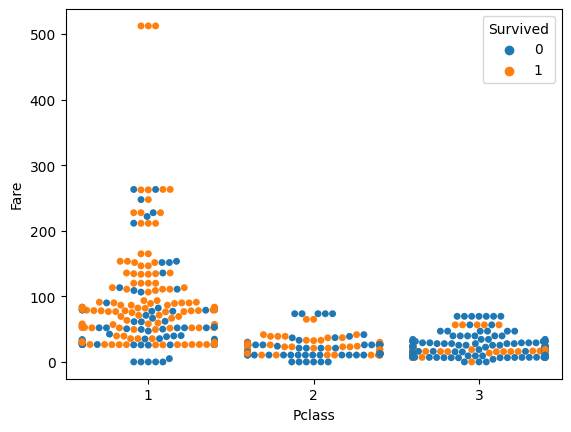

In [286]:
sns.swarmplot(x='Pclass',y='Fare', hue='Survived',data=t)

In [287]:
categories = {"female": 1, "male": 0}
train['Sex']= train['Sex'].map(categories)
test['Sex']= test['Sex'].map(categories)

categories = {"S": 1, "C": 2, "Q": 3}
train['Embarked']= train['Embarked'].map(categories)
test['Embarked']= test['Embarked'].map(categories)

categories = train.Cabin.unique()
train['Cabin'] = train.Cabin.astype("category").cat.codes
test['Cabin'] = test.Cabin.astype("category").cat.codes

In [295]:
train = train.drop(['Name','Ticket','PassengerId', 'Age_Category', 'Fare_Category'], axis=1)
test = test.drop(['Name','Ticket','PassengerId'], axis=1)

plt.figure(figsize=(14,8))
sns.heatmap(train.corr(), annot=True)
plt.tight_layout()

KeyError: "['Name', 'Ticket', 'PassengerId', 'Age_Category', 'Fare_Category'] not found in axis"

In [300]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(train, train, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

(712, 11) (179, 11)
(712, 11) (179, 11)


ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.